In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import files
  
  
uploaded = files.upload()

Saving homeprices.csv to homeprices.csv


In [4]:
df = pd.read_csv("homeprices.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


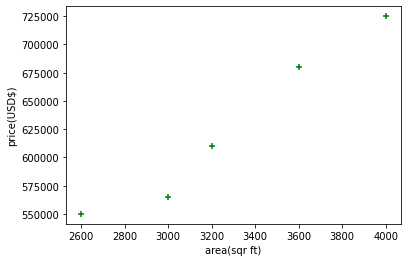

In [10]:
#making a scatter plot to plot area and price

%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(USD$)')
plt.scatter(df.area, df.price, color='green', marker='+')

In [11]:
#begin linerar regression

In [23]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)
reg.predict([[3300]])

array([628715.75342466])

In [28]:
# Y = mx + b price = m * area + b

reg.coef_ #m


array([135.78767123])

In [29]:
reg.intercept_ #y

180616.43835616432

In [31]:
135.78767123*3300+180616.43835616432

628715.7534151643

In [32]:
uploadedAreas = files.upload()

Saving area.csv to area.csv


In [36]:
areaDf = pd.read_csv('area.csv')

areaDf.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [40]:
price_prediction = reg.predict(areaDf)

In [43]:
areaDf['prices'] = price_prediction

In [44]:
areaDf

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [45]:
##### BEGIN MULTIVARIATE REGRESSION

In [46]:
#as the home gets older, the price goes down
#even if the house is big, its old, thus the price will shoot down
# price(dependent variable) = m1 * area + m2 * bedrooms + m3 * age + b (area, roooms, age are independent variables)

In [48]:
uploadedMultivariate = files.upload()

Saving homeprices2.csv to homeprices2 (1).csv


In [50]:
mvdf = pd.read_csv('homeprices2.csv')
#mv = multivariate df = dataframe

In [52]:
mvdf.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [53]:
# data preprocessing for handling the missing value in 2. we will find the median

In [59]:
import math
median_bedrooms = math.floor(mvdf.bedrooms.median())
median_bedrooms

4

In [64]:
mvdf.bedrooms = mvdf.bedrooms.fillna(median_bedrooms)
mvdf

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [68]:
mvreg = linear_model.LinearRegression()
mvreg.fit(mvdf[['area', 'bedrooms', 'age']], mvdf.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
mvreg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [76]:
mvreg.predict([[3000, 4, 40]])
#cheaper because old

array([521797.13165825])

In [79]:
mvreg.predict([[3000, 4, 10]])
#more expensive because 30 years newer

array([618748.66891723])